In [1]:
import tensorflow as tf
import numpy as np

dataset = tf.data.Dataset.from_tensor_slices(
    np.array([1.0, 2.0, 3.0, 4.0, 5.0])
)

for element in dataset:
    print(element)


tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(2.0, shape=(), dtype=float64)
tf.Tensor(3.0, shape=(), dtype=float64)
tf.Tensor(4.0, shape=(), dtype=float64)
tf.Tensor(5.0, shape=(), dtype=float64)


训练集: X=(60000, 28, 28), y=(60000,)
测试集: X=(10000, 28, 28), y=(10000,)


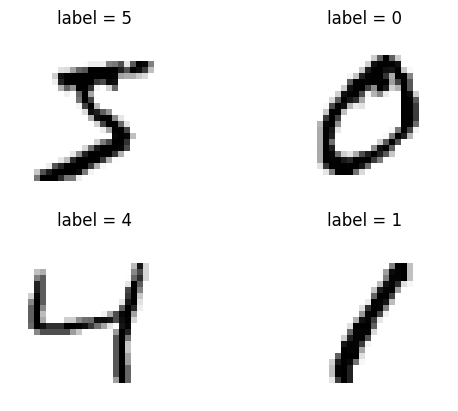

In [2]:
from tensorflow.keras import datasets  # 导入经典数据集加载模块
import matplotlib.pyplot as plt

# 导入数据
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# 总结加载的数据集
print('训练集: X={0}, y={1}'.format(X_train.shape, y_train.shape))
print('测试集: X={0}, y={1}'.format(X_test.shape, y_test.shape))

# 绘制前4个图片
for i in range(4):
    # 定义子图
    plt.subplot(2, 2, i + 1)
    # 绘制像素数据
    plt.title('label = {}'.format(y_train[i]))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray_r'))
    plt.axis('off')

# 显示图片
plt.show()


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, Sequential, layers

# 导入数据
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# 数据预处理
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32) / 255.0
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.batch(32).repeat(10)

# 构建模型
model = Sequential()  # 搭建空顺序模型
model.add(layers.Flatten(input_shape=(28, 28)))  # 输入层展平
model.add(layers.Dense(10, activation='softmax'))  # 输出层，10分类

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics

# 导入数据
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# 数据预处理
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32) / 255.0
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.batch(32).repeat(10)

# 获取图片的大小
in_shape = X_train.shape[1:]  # 形状为 (28, 28)
# 获取类别数目
n_classes = len(np.unique(y_train))  # 类别数为10

# 构建模型
model = Sequential()  # 搭建空顺序模型
model.add(layers.Flatten(input_shape=in_shape))  # 展平层
model.add(layers.Dense(n_classes, activation='softmax'))  # 输出层

# 定义优化器，学习率为0.01
optimizer = optimizers.SGD(learning_rate=0.01)

# 定义累积准确率的指标
acc_meter = metrics.Accuracy()

# 开始训练
for step, (x, y) in enumerate(dataset):
    with tf.GradientTape() as tape:
        # 计算模型输出
        out = model(x)
        # 将标签转为 one-hot 编码
        y_onehot = tf.one_hot(y, depth=10)
        # 计算损失
        loss = tf.square(out - y_onehot)
        loss = tf.reduce_sum(loss) / 32

    # 更新准确率
    acc_meter.update_state(tf.argmax(out, axis=1), y)
    # 计算梯度并优化
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # 每200步打印一次日志
    if step % 200 == 0:
        print('step {0}, loss: {1:.3f}, acc: {2:.2f} %'.format(
            step, float(loss), acc_meter.result().numpy() * 100))
        acc_meter.reset_states()


step 0, loss: 0.946, acc: 3.12 %
step 200, loss: 0.814, acc: 27.14 %
step 400, loss: 0.724, acc: 47.03 %
step 600, loss: 0.534, acc: 56.72 %
step 800, loss: 0.438, acc: 68.31 %
step 1000, loss: 0.448, acc: 73.23 %
step 1200, loss: 0.359, acc: 78.52 %
step 1400, loss: 0.378, acc: 79.81 %
step 1600, loss: 0.291, acc: 81.39 %
step 1800, loss: 0.249, acc: 84.28 %
step 2000, loss: 0.296, acc: 85.81 %
step 2200, loss: 0.205, acc: 84.83 %
step 2400, loss: 0.344, acc: 83.50 %
step 2600, loss: 0.222, acc: 85.59 %
step 2800, loss: 0.162, acc: 86.33 %
step 3000, loss: 0.399, acc: 85.20 %
step 3200, loss: 0.223, acc: 86.02 %
step 3400, loss: 0.204, acc: 86.39 %
step 3600, loss: 0.141, acc: 85.81 %
step 3800, loss: 0.238, acc: 89.03 %
step 4000, loss: 0.309, acc: 88.00 %
step 4200, loss: 0.216, acc: 86.73 %
step 4400, loss: 0.215, acc: 86.98 %
step 4600, loss: 0.228, acc: 87.86 %
step 4800, loss: 0.178, acc: 86.52 %
step 5000, loss: 0.188, acc: 88.03 %
step 5200, loss: 0.294, acc: 87.03 %
step 5400

In [4]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras

# 定义预处理函数
def preprocess(x, y):
    # 标准化像素值到 [0, 1]
    x = tf.cast(x, dtype=tf.float32) / 255.0
    x = tf.reshape(x, [-1, 28, 28])  # 调整形状
    y = tf.cast(y, dtype=tf.int32)  # 转换标签为整数
    y = tf.one_hot(y, depth=10)  # 转为 one-hot 编码
    # 返回预处理后的 x 和 y
    return x, y

# 加载数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 获取图片的大小
in_shape = X_train.shape[1:]  # 形状为 (28, 28)
# 获取类别的个数
n_classes = len(np.unique(y_train))  # 类别数为10

# 数据预处理
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 构建模型
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=in_shape))  # 展平层
model.add(keras.layers.Dense(n_classes, activation='softmax'))  # 输出层

# 编译模型：定义优化器、损失函数和评价指标
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


测试集的预测准确率: 0.928
1/1 [==============================] - 0s 20ms/step
预测的数字为: 5


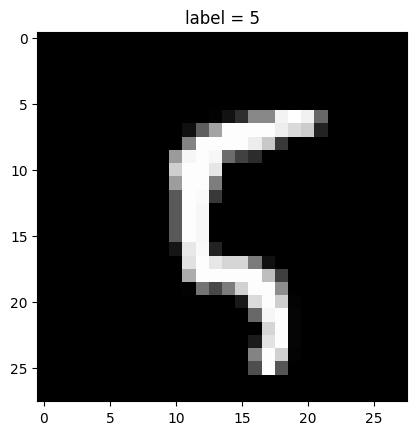

In [10]:
# 模型拟合
model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)

# 评估模型
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('测试集的预测准确率: {0:.3f}'.format(acc))

# 单个图片预测
image = X_train[100]  # 选择第101张图片做测试
import tensorflow as tf
image = tf.expand_dims(image, axis=0)  # 扩展维度

yhat = model.predict([image])  # 预测
print('预测的数字为: {0}'.format(np.argmax(yhat)))

# 绘制像素数据
import matplotlib.pyplot as plt
plt.title('label = {}'.format(y_train[100]))
plt.imshow(X_train[100], cmap=plt.get_cmap('gray'))  # 灰度显示
# plt.axis('off')  # 关闭坐标轴

# 显示图片
plt.show()


In [7]:
# 将模型结构序列化为JSON格式
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# 将模型权值序列化为HDF5格式
model.save_weights("model.h5")
print("成功：将模型保存本地！")


成功：将模型保存本地！


In [13]:
# 读取模型文件
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

# 反序列化：导入模型结构
from tensorflow.keras.models import model_from_json
loaded_model = model_from_json(loaded_model_json)

# 反序列化：将权值导入到加载的模型中
loaded_model.load_weights("model.h5")
print("成功：从本地文件中导入权值参数！")

# 编译导入的模型
loaded_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 测试模型是否可用
loss, acc = loaded_model.evaluate(X_test, y_test, verbose=0)
print('测试集合的预测准确率: {0:.2f} %'.format(acc * 100))


成功：从本地文件中导入权值参数！
测试集合的预测准确率: 92.80 %
